### Context:

- A Non-Banking Finance Company like LoanTap is an online platform committed to delivering customized loan products to millennials. 
- They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.


- The data science team is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

- Company deploys formal credit to salaried individuals and businesses 4 main financial instruments:

    - Personal Loan
    - EMI Free Loan
    - Personal Overdraft
    - Advance Salary Loan

- This case study will focus on the underwriting process behind Personal Loan only



## Problem Statement:

- Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

####  Tradeoff Questions:

- How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

- Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone


## Data dictionary:

1. loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. term : The number of payments on the loan. Values are in months and can be either 36 or 60.
3. int_rate : Interest Rate on the loan
4. installment : The monthly payment owed by the borrower if the loan originates.
5. grade : Institution assigned loan grade
6. sub_grade : Institution assigned loan subgrade
7. emp_title :The job title supplied by the Borrower when applying for the loan.*
8. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
10. annual_inc : The self-reported annual income provided by the borrower during registration.
11. verification_status : Indicates if income was verified by Institution, not verified, or if the income source was verified
12. issue_d : The month which the loan was funded
13. loan_status : Current status of the loan - Target Variable
14. purpose : A category provided by the borrower for the loan request.
15. title : The loan title provided by the borrower
16. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested Institution loan, divided by the borrower’s self-reported monthly income.
17. earliest_cr_line :The month the borrower's earliest reported credit line was opened
18. open_acc : The number of open credit lines in the borrower's credit file.
19. pub_rec : Number of derogatory public records
20. revol_bal : Total credit revolving balance
21. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22. total_acc : The total number of credit lines currently in the borrower's credit file
23. initial_list_status : The initial listing status of the loan. Possible values are – W, F
24. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
25. mort_acc : Number of mortgage accounts.
26. pub_rec_bankruptcies : Number of public record bankruptcies
27. Address: Address of the individual









In [246]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [247]:
df = pd.read_csv("logistic_regression.txt")

In [248]:
df = df.dropna()

In [249]:
df = df.drop(["emp_length",
         "verification_status",
        "issue_d",
         "title",
         "earliest_cr_line",
         "initial_list_status",
         "emp_title"
         
        ],axis = 1)


In [250]:
# df.address.apply(lambda x: x[-5:])
df['Zip_Code'] = df.address.apply(lambda x: x[-5:])
df.drop("address",axis = 1 , inplace=True)


In [251]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,Zip_Code
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Fully Paid,vacation,26.24,16.0,0.0,36369.0,41.8,25.0,INDIVIDUAL,0.0,0.0,22690
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Fully Paid,debt_consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,INDIVIDUAL,3.0,0.0,05113
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Fully Paid,credit_card,12.79,13.0,0.0,11987.0,92.2,26.0,INDIVIDUAL,0.0,0.0,05113
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Fully Paid,credit_card,2.60,6.0,0.0,5472.0,21.5,13.0,INDIVIDUAL,0.0,0.0,00813
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Charged Off,credit_card,33.95,13.0,0.0,24584.0,69.8,43.0,INDIVIDUAL,1.0,0.0,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36 months,13.11,202.49,B,B4,RENT,64000.0,Fully Paid,debt_consolidation,10.81,7.0,0.0,11456.0,97.1,9.0,INDIVIDUAL,0.0,0.0,05113
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Fully Paid,debt_consolidation,15.63,6.0,0.0,1990.0,34.3,23.0,INDIVIDUAL,0.0,0.0,30723
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Fully Paid,debt_consolidation,21.45,6.0,0.0,43263.0,95.7,8.0,INDIVIDUAL,1.0,0.0,05113
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Fully Paid,debt_consolidation,17.56,15.0,0.0,32704.0,66.9,23.0,INDIVIDUAL,0.0,0.0,70466


In [252]:
df["loan_status"] = df["loan_status"].replace({"Fully Paid":0,
                           "Charged Off":1
                          })

In [253]:
df["loan_status"].value_counts()

0    269556
1     66312
Name: loan_status, dtype: int64

# Term

In [254]:
df["term"].value_counts(normalize=True, dropna=False).index

Index([' 36 months', ' 60 months'], dtype='object')

In [255]:
df.term = df.term.replace({' 36 months' : 0,
                 ' 60 months' : 1
                })



In [349]:
term_map = {' 36 months' : 0,
                 ' 60 months' : 1}

# Grade

In [256]:
df["grade"].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [257]:
df["grade"] = df["grade"].replace({"A":0,
                    "B":1,
                    "C":2,
                    "D":3,
                    "E":4,
                    "F":5,
                    "G":6})



In [350]:
Grade_map = {"A":0,
                    "B":1,
                    "C":2,
                    "D":3,
                    "E":4,
                    "F":5,
                    "G":6}

# sub_grade

In [258]:
len(df["sub_grade"].unique())

35

In [259]:
mapping_dict = {}
x = 0
for i in sorted(df["sub_grade"].unique()):
    mapping_dict[i] = x
    x+= 1 

In [260]:
sub_grade_map = mapping_dict
sub_grade_map

{'A1': 0,
 'A2': 1,
 'A3': 2,
 'A4': 3,
 'A5': 4,
 'B1': 5,
 'B2': 6,
 'B3': 7,
 'B4': 8,
 'B5': 9,
 'C1': 10,
 'C2': 11,
 'C3': 12,
 'C4': 13,
 'C5': 14,
 'D1': 15,
 'D2': 16,
 'D3': 17,
 'D4': 18,
 'D5': 19,
 'E1': 20,
 'E2': 21,
 'E3': 22,
 'E4': 23,
 'E5': 24,
 'F1': 25,
 'F2': 26,
 'F3': 27,
 'F4': 28,
 'F5': 29,
 'G1': 30,
 'G2': 31,
 'G3': 32,
 'G4': 33,
 'G5': 34}

In [261]:
df["sub_grade"] = df["sub_grade"].replace(mapping_dict)

# home_ownership

In [262]:
df.home_ownership.value_counts()

MORTGAGE    170832
RENT        133932
OWN          31045
OTHER           30
NONE            28
ANY              1
Name: home_ownership, dtype: int64

In [263]:
df.home_ownership.value_counts().index

Index(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype='object')

In [264]:
df.home_ownership.replace({"NONE":"OTHER",
                          "ANY":"OTHER"},inplace=True)

In [265]:
pd.crosstab(columns=df["home_ownership"],
            index=df["loan_status"], margins=True, normalize = "columns")

home_ownership,MORTGAGE,OTHER,OWN,RENT,All
loan_status,,,,,
0,0.830219,0.779661,0.795845,0.76886,0.802565
1,0.169781,0.220339,0.204155,0.23114,0.197435


In [266]:
home_ownership_map = pd.crosstab(columns=df["home_ownership"],
            index=df["loan_status"], margins=True, normalize = "columns").loc[1]
home_ownership_map

home_ownership
MORTGAGE    0.169781
OTHER       0.220339
OWN         0.204155
RENT        0.231140
All         0.197435
Name: 1, dtype: float64

In [267]:
home_ownership_map = home_ownership_map.to_dict()

In [268]:
df["home_ownership"] = df["home_ownership"].replace(home_ownership_map)

# purpose_map

In [269]:
purpose_map = pd.crosstab(columns=df["purpose"],
            index=df["loan_status"], margins=True, normalize = "columns").loc[1]
purpose_map

purpose
car                   0.140208
credit_card           0.166309
debt_consolidation    0.208164
educational           0.000000
home_improvement      0.171615
house                 0.211325
major_purchase        0.177792
medical               0.220438
moving                0.246556
other                 0.217858
renewable_energy      0.235556
small_business        0.314689
vacation              0.189673
wedding               0.143165
All                   0.197435
Name: 1, dtype: float64

In [270]:
purpose_map = purpose_map.to_dict()

In [271]:
purpose_map

{'car': 0.1402081977878985,
 'credit_card': 0.16630877656645743,
 'debt_consolidation': 0.20816406441192306,
 'educational': 0.0,
 'home_improvement': 0.17161480877934512,
 'house': 0.21132516053706946,
 'major_purchase': 0.17779173865242656,
 'medical': 0.22043840691571473,
 'moving': 0.2465564738292011,
 'other': 0.21785846609855503,
 'renewable_energy': 0.23555555555555555,
 'small_business': 0.3146894318516338,
 'vacation': 0.18967280163599182,
 'wedding': 0.14316469321851452,
 'All': 0.1974347064918361}

In [272]:
df["purpose"] = df["purpose"].replace(purpose_map)

# Zip code: 

In [273]:
Zip_Code_map = pd.crosstab(columns=df["Zip_Code"],
            index=df["loan_status"], margins=True, normalize = "columns").loc[1]
Zip_Code_map

Zip_Code
00813    0.000000
05113    0.000000
11650    1.000000
22690    0.194612
29597    0.000000
30723    0.196330
48052    0.201458
70466    0.196925
86630    1.000000
93700    1.000000
All      0.197435
Name: 1, dtype: float64

In [274]:
Zip_Code_map = Zip_Code_map.to_dict()
Zip_Code_map

{'00813': 0.0,
 '05113': 0.0,
 '11650': 1.0,
 '22690': 0.19461165454393445,
 '29597': 0.0,
 '30723': 0.1963303898700433,
 '48052': 0.2014581006763733,
 '70466': 0.1969254960379037,
 '86630': 1.0,
 '93700': 1.0,
 'All': 0.1974347064918361}

In [275]:
df["Zip_Code"] = df["Zip_Code"].replace(Zip_Code_map)

# application_type

In [276]:
application_type_map = pd.crosstab(columns=df["application_type"],
            index=df["loan_status"], margins=True, normalize = "columns").loc[1]
application_type_map

application_type
DIRECT_PAY    0.326531
INDIVIDUAL    0.197431
JOINT         0.099678
All           0.197435
Name: 1, dtype: float64

In [277]:
application_type_map = application_type_map.to_dict()
application_type_map

{'DIRECT_PAY': 0.32653061224489793,
 'INDIVIDUAL': 0.1974310492914062,
 'JOINT': 0.09967845659163987,
 'All': 0.1974347064918361}

In [278]:
df["application_type"] = df["application_type"].replace(application_type_map)

In [279]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,Zip_Code
0,10000.0,0,11.44,329.48,1,8,0.231140,117000.0,0,0.189673,26.24,16.0,0.0,36369.0,41.8,25.0,0.197431,0.0,0.0,0.194612
1,8000.0,0,11.99,265.68,1,9,0.169781,65000.0,0,0.208164,22.05,17.0,0.0,20131.0,53.3,27.0,0.197431,3.0,0.0,0.000000
2,15600.0,0,10.49,506.97,1,7,0.231140,43057.0,0,0.166309,12.79,13.0,0.0,11987.0,92.2,26.0,0.197431,0.0,0.0,0.000000
3,7200.0,0,6.49,220.65,0,1,0.231140,54000.0,0,0.166309,2.60,6.0,0.0,5472.0,21.5,13.0,0.197431,0.0,0.0,0.000000
4,24375.0,1,17.27,609.33,2,14,0.169781,55000.0,1,0.166309,33.95,13.0,0.0,24584.0,69.8,43.0,0.197431,1.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,0,13.11,202.49,1,8,0.231140,64000.0,0,0.208164,10.81,7.0,0.0,11456.0,97.1,9.0,0.197431,0.0,0.0,0.000000
396025,10000.0,1,10.99,217.38,1,8,0.231140,40000.0,0,0.208164,15.63,6.0,0.0,1990.0,34.3,23.0,0.197431,0.0,0.0,0.196330
396026,21000.0,0,12.29,700.42,2,10,0.169781,110000.0,0,0.208164,21.45,6.0,0.0,43263.0,95.7,8.0,0.197431,1.0,0.0,0.000000
396027,5000.0,0,9.99,161.32,1,5,0.231140,56500.0,0,0.208164,17.56,15.0,0.0,32704.0,66.9,23.0,0.197431,0.0,0.0,0.196925


In [280]:
num_cols = ['loan_amnt', 'int_rate', 'annual_inc',  'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc' ]
removed_ooutlier = df.copy()
for col in num_cols:
    mean = removed_ooutlier[col].mean()
    std = removed_ooutlier[col].std()
    upper_limit = mean+3*std
    lower_limit = mean-3*std
    removed_ooutlier = removed_ooutlier[(removed_ooutlier[col]<upper_limit) & (removed_ooutlier[col]>lower_limit)]
removed_ooutlier.shape
numerical_data = removed_ooutlier.select_dtypes(include='number')
numerical_data

num_cols = numerical_data.columns
len(num_cols)


20

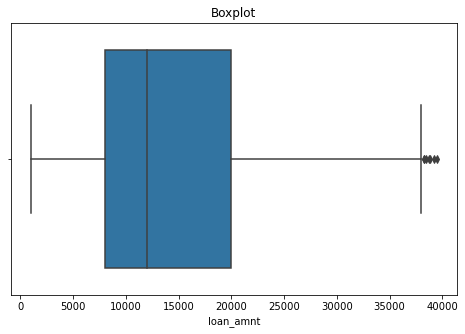

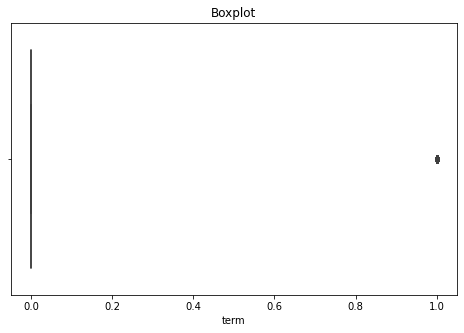

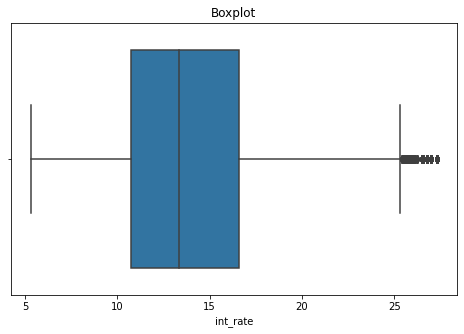

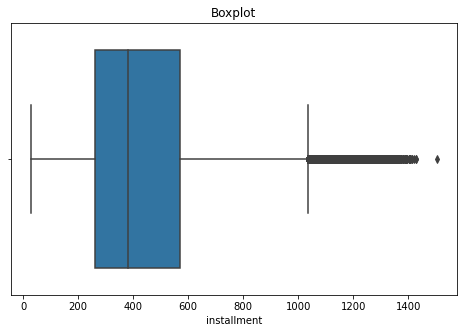

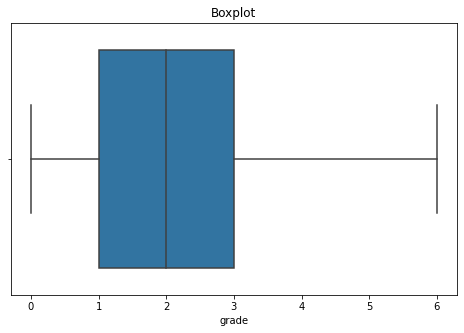

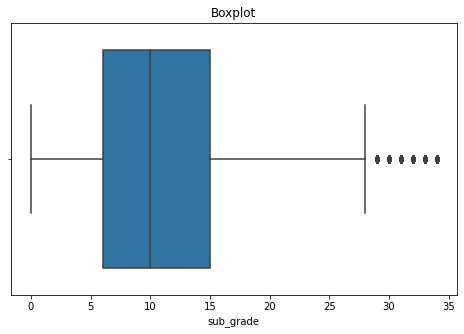

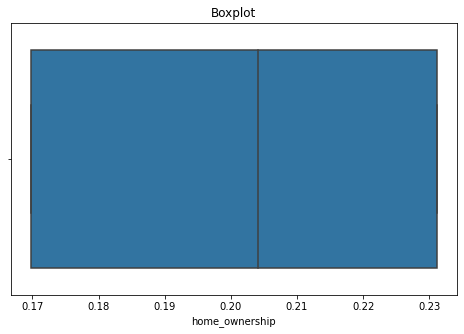

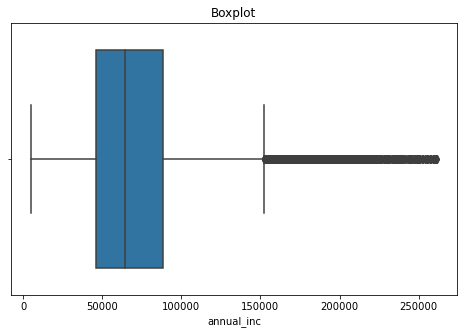

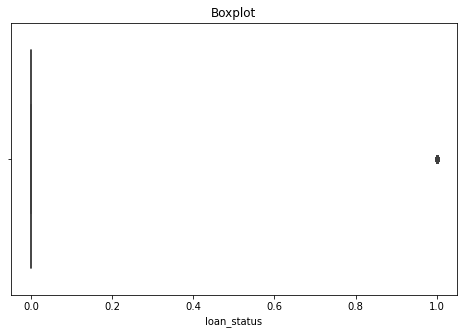

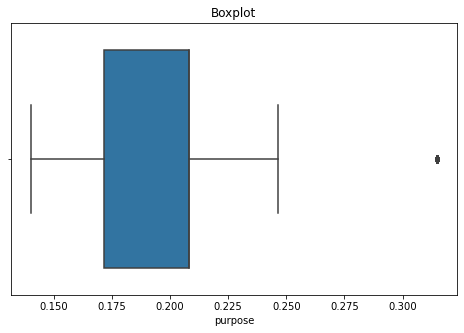

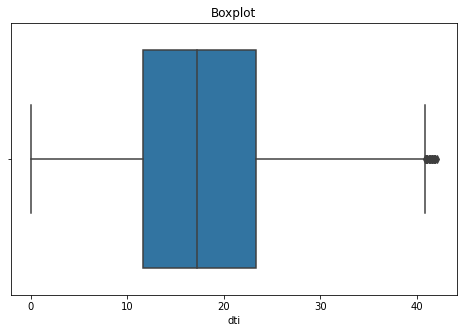

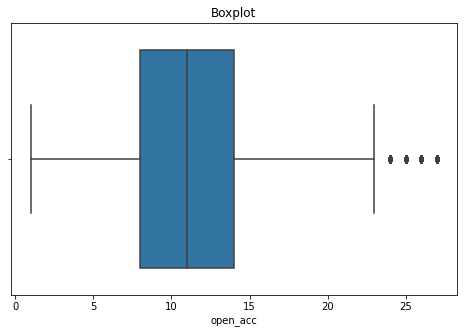

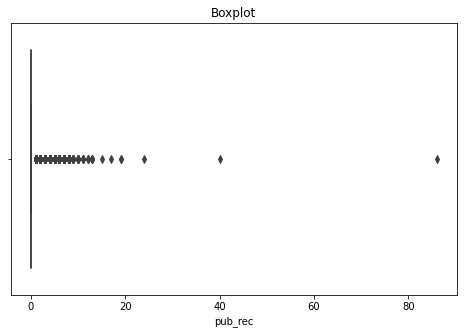

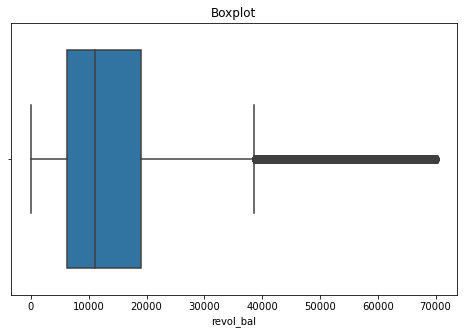

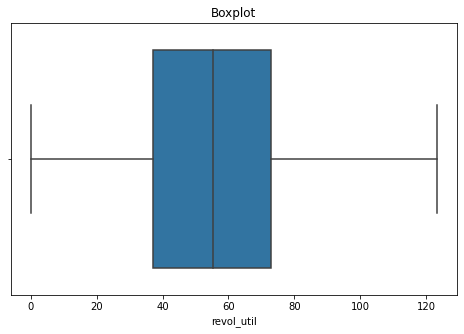

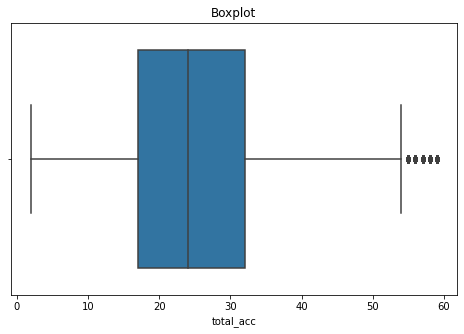

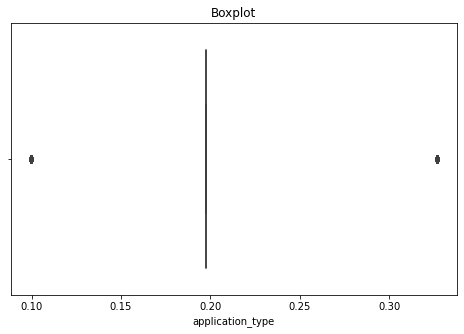

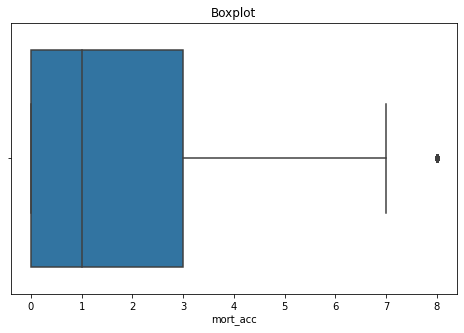

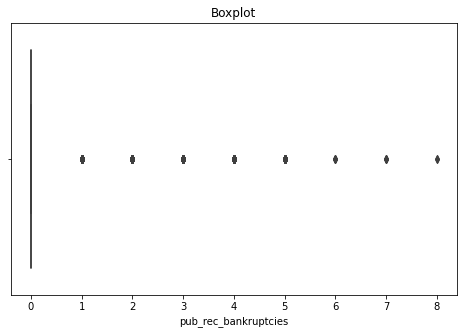

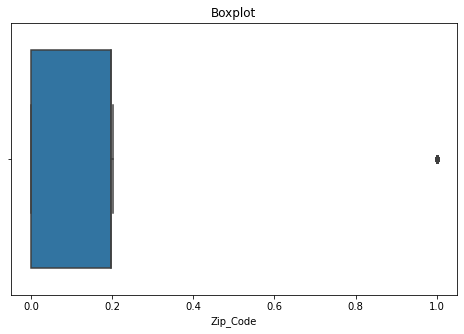

In [284]:
def box_plot(col):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=removed_ooutlier[col])
    plt.title('Boxplot')
    plt.show()

for col in num_cols:
    box_plot(col)


In [281]:
df = removed_ooutlier.copy()

In [282]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
df['pub_rec'] = df.pub_rec.apply(pub_rec)

df['mort_acc'] = df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

# LocalOutlierFactor

In [283]:
from sklearn.neighbors import LocalOutlierFactor


# Create LOF object
lof = LocalOutlierFactor(n_neighbors=15, contamination=0.10)

# Fit LOF object to data
y_pred = lof.fit_predict(df)


In [98]:
MAP = pd.Series(y_pred)
MAP= MAP.map({-1: False, 1: True})
data = df.loc[MAP.values]


In [99]:
X = data.drop("loan_status",axis = 1)
y = data["loan_status"]


In [285]:
y.value_counts(normalize=True)

0    0.802005
1    0.197995
Name: loan_status, dtype: float64

# train_test_split

In [286]:
from sklearn.model_selection import train_test_split

X_train , X_test,  y_train , y_test = train_test_split(X,
                                                      y,
                                                      test_size=0.2,
                                                      random_state=45)

# StandardScaler

In [287]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# SMOTE

In [288]:
# X_train,y_train

In [289]:
from imblearn.over_sampling import SMOTE

# Define SMOTE object
sm = SMOTE(k_neighbors = 11,random_state=42)

# Apply SMOTE to X_train and y_train
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [290]:
y_smote.value_counts()

1    183219
0    183219
Name: loan_status, dtype: int64

In [291]:
from sklearn.metrics import precision_score, recall_score, fbeta_score,confusion_matrix,ConfusionMatrixDisplay

# DecisionTreeClassifier

In [292]:
from sklearn.tree import DecisionTreeClassifier


In [312]:

DTC = DecisionTreeClassifier(max_depth = 7)
DTC.fit(X_smote,y_smote)

DecisionTreeClassifier(max_depth=7)

In [313]:
DTC.score(X_smote,y_smote),DTC.score(X_train,y_train),DTC.score(X_test,y_test)

(0.7403298784514707, 0.7566564063943535, 0.7598689971627728)

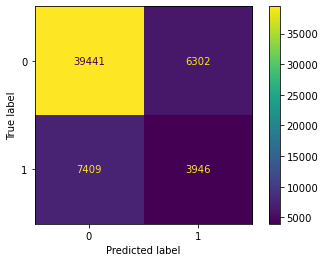

In [314]:
ConfusionMatrixDisplay(confusion_matrix(y_test,DTC.predict(X_test))).plot()

# LogisticRegression

In [318]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(class_weight = "balanced")

LR.fit(X_smote,y_smote)
LR.score(X_smote,y_smote),LR.score(X_test,y_test)

(0.6573936109246312, 0.6739465480402116)

In [323]:
def custom_predict(X, model,threshold):
        probs = model.predict_proba(X) 
        return (probs[:, 1] > threshold).astype(int)



threshold = 0.75
new_preds = custom_predict(X=X_test,model =LR , threshold=threshold)


from sklearn.metrics import accuracy_score

print(f"Precision at theshold {threshold} is : ",precision_score(y_test,new_preds))


Precision at theshold 0.75 is :  0.5010290418477018


In [339]:
y_pred = custom_predict(X=X_test,model =LR , threshold=0.75)
accuracy_score(y_test,y_pred)

0.8012890118743213

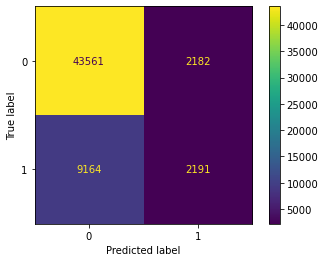

In [340]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [341]:
y_pred_test = custom_predict(X=X_test,model =LR , threshold=0.75)
y_pred_train = custom_predict(X=X_train,model =LR , threshold=0.75)

print(f"""

Accuracy_score : Test and Train : 
{accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred)},

precision_score : Test and Train : 
{precision_score(y_test,
                y_pred_test),precision_score(y_train,
                                             y_pred_train)},
                                             
recall_score : Test and Train : 
{recall_score(y_test,
             y_pred_test),recall_score(y_train,
                                              y_pred_train)},
                                              
fbeta_score : Test and Train : 
{fbeta_score(y_test,
            y_pred_test,
            beta=0.5),fbeta_score(y_train,
                                  y_pred_train,
                                  beta=0.5)}
""")




Accuracy_score : Test and Train : 
(0.8012890118743213, 0.8012890118743213),

precision_score : Test and Train : 
(0.5010290418477018, 0.47654406262591376),
                                             
recall_score : Test and Train : 
(0.19295464553060326, 0.18328536639362408),
                                              
fbeta_score : Test and Train : 
(0.3797621936423199, 0.36101759955347024)



# RandomForestClassifier

In [342]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=200,
                             max_depth = 7,class_weight = "balanced")

RFC.fit(X_smote,y_smote)
RFC.score(X_train,y_train),RFC.score(X_test,y_test)

(0.659642101852541, 0.6634733265613506)

In [343]:
RFC.score(X_smote,y_smote),RFC.score(X_train,y_train),RFC.score(X_test,y_test)

(0.7101910828025477, 0.659642101852541, 0.6634733265613506)

In [344]:
y_pred_test = custom_predict(X=X_test,model =RFC , threshold=0.75)
y_pred_train = custom_predict(X=X_train,model =RFC , threshold=0.75)

print(f"""

Accuracy_score : Test and Train : 
{accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred)},

precision_score : Test and Train : 
{precision_score(y_test,
                y_pred_test),precision_score(y_train,
                                             y_pred_train)},
                                             
recall_score : Test and Train : 
{recall_score(y_test,
             y_pred_test),recall_score(y_train,
                                              y_pred_train)},
                                              
fbeta_score : Test and Train : 
{fbeta_score(y_test,
            y_pred_test,
            beta=0.5),fbeta_score(y_train,
                                  y_pred_train,
                                  beta=0.5)}
""")




Accuracy_score : Test and Train : 
(0.8012890118743213, 0.8012890118743213),

precision_score : Test and Train : 
(0.5484171322160148, 0.5410798122065728),
                                             
recall_score : Test and Train : 
(0.05187142228093351, 0.05102944432145229),
                                              
fbeta_score : Test and Train : 
(0.18816689029454986, 0.18525960456518245)



In [345]:
X

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,0,11.44,329.48,1,8,0.231140,117000.0,0.189673,26.24,16.0,0,36369.0,41.8,25.0,0.197431,0,0
1,8000.0,0,11.99,265.68,1,9,0.169781,65000.0,0.208164,22.05,17.0,0,20131.0,53.3,27.0,0.197431,1,0
3,7200.0,0,6.49,220.65,0,1,0.231140,54000.0,0.166309,2.60,6.0,0,5472.0,21.5,13.0,0.197431,0,0
4,24375.0,1,17.27,609.33,2,14,0.169781,55000.0,0.166309,33.95,13.0,0,24584.0,69.8,43.0,0.197431,1,0
5,20000.0,0,13.33,677.07,2,12,0.169781,86788.0,0.208164,16.31,8.0,0,25757.0,100.6,23.0,0.197431,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396022,12000.0,0,12.29,400.24,2,10,0.231140,52100.0,0.208164,17.28,6.0,0,9580.0,66.1,18.0,0.197431,0,0
396025,10000.0,1,10.99,217.38,1,8,0.231140,40000.0,0.208164,15.63,6.0,0,1990.0,34.3,23.0,0.197431,0,0
396026,21000.0,0,12.29,700.42,2,10,0.169781,110000.0,0.208164,21.45,6.0,0,43263.0,95.7,8.0,0.197431,1,0
396027,5000.0,0,9.99,161.32,1,5,0.231140,56500.0,0.208164,17.56,15.0,0,32704.0,66.9,23.0,0.197431,0,0


In [356]:
term_map,Grade_map,sub_grade_map,home_ownership_map,purpose_map,application_type_map

({' 36 months': 0, ' 60 months': 1},
 {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6},
 {'A1': 0,
  'A2': 1,
  'A3': 2,
  'A4': 3,
  'A5': 4,
  'B1': 5,
  'B2': 6,
  'B3': 7,
  'B4': 8,
  'B5': 9,
  'C1': 10,
  'C2': 11,
  'C3': 12,
  'C4': 13,
  'C5': 14,
  'D1': 15,
  'D2': 16,
  'D3': 17,
  'D4': 18,
  'D5': 19,
  'E1': 20,
  'E2': 21,
  'E3': 22,
  'E4': 23,
  'E5': 24,
  'F1': 25,
  'F2': 26,
  'F3': 27,
  'F4': 28,
  'F5': 29,
  'G1': 30,
  'G2': 31,
  'G3': 32,
  'G4': 33,
  'G5': 34},
 {'MORTGAGE': 0.1697808373138522,
  'OTHER': 0.22033898305084745,
  'OWN': 0.204155258495732,
  'RENT': 0.2311396828241197,
  'All': 0.1974347064918361},
 {'car': 0.1402081977878985,
  'credit_card': 0.16630877656645743,
  'debt_consolidation': 0.20816406441192306,
  'educational': 0.0,
  'home_improvement': 0.17161480877934512,
  'house': 0.21132516053706946,
  'major_purchase': 0.17779173865242656,
  'medical': 0.22043840691571473,
  'moving': 0.2465564738292011,
  'other': 0.2178584660

In [357]:
y

0         0
1         0
3         0
4         1
5         0
         ..
396022    0
396025    0
396026    0
396027    0
396028    0
Name: loan_status, Length: 285487, dtype: int64